In [3]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [22]:
artists_billboard = pd.read_csv(r"artists_billboard_fix3.csv")

In [23]:
artists_billboard.shape


(635, 11)

In [24]:
artists_billboard.head()


,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


Tratamiento de los datos: 

El mood de la canción lo cambiaré a numérico, donde sea Aggressive = 0, Brooding = 1, Cool = 2, Defiant = 3, Easygoing = 4, Empowering = 5, Energizing = 6, Excited = 7, Fiery = 8, 
Gritty = 9, Lively = 10, Melancholy = 11, Other = 12, Peaceful = 13, Romantic = 14, Rowdy = 15, Sensual = 16, Sentimental = 17, Sophisticated = 18, Stirring = 19, Upbeat = 20, Urgent = 21, Yearning = 22

In [25]:
artists_billboard['mood'] = artists_billboard['mood'].replace('Aggressive', 0)
artists_billboard['mood'] = artists_billboard['mood'].replace('Brooding', 1)
artists_billboard['mood'] = artists_billboard['mood'].replace('Cool', 2)
artists_billboard['mood'] = artists_billboard['mood'].replace('Defiant', 3)
artists_billboard['mood'] = artists_billboard['mood'].replace('Easygoing', 4)
artists_billboard['mood'] = artists_billboard['mood'].replace('Empowering', 5)
artists_billboard['mood'] = artists_billboard['mood'].replace('Energizing', 6)
artists_billboard['mood'] = artists_billboard['mood'].replace('Excited', 7)
artists_billboard['mood'] = artists_billboard['mood'].replace('Fiery', 8)
artists_billboard['mood'] = artists_billboard['mood'].replace('Gritty', 9)
artists_billboard['mood'] = artists_billboard['mood'].replace('Lively', 10)
artists_billboard['mood'] = artists_billboard['mood'].replace('Melancholy', 11)
artists_billboard['mood'] = artists_billboard['mood'].replace('Other', 12)
artists_billboard['mood'] = artists_billboard['mood'].replace('Peaceful', 13)
artists_billboard['mood'] = artists_billboard['mood'].replace('Romantic', 14)
artists_billboard['mood'] = artists_billboard['mood'].replace('Rowdy', 15)
artists_billboard['mood'] = artists_billboard['mood'].replace('Sensual', 16)
artists_billboard['mood'] = artists_billboard['mood'].replace('Sentimental', 17)
artists_billboard['mood'] = artists_billboard['mood'].replace('Sophisticated', 18)
artists_billboard['mood'] = artists_billboard['mood'].replace('Stirring', 19)
artists_billboard['mood'] = artists_billboard['mood'].replace('Upbeat', 20)
artists_billboard['mood'] = artists_billboard['mood'].replace('Urgent', 21)
artists_billboard['mood'] = artists_billboard['mood'].replace('Yearning', 22)


C:\Users\vedruna\AppData\Local\Temp\ipykernel_3000\2042083817.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  artists_billboard['mood'] = artists_billboard['mood'].replace('Yearning', 22)


In [26]:
# Ahora consulto de nuevo el head del dataset para ver los cambios
artists_billboard.head()
# Se ha cambiado correctamente a valores numéricos

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,1,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",6,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,7,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,1,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,22,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


Ahora haré lo mismo que con el mood pero con el tempo: Fast Tempo = 0, Medium tempo = 1, Slow Tempo = 2


In [27]:
artists_billboard['tempo'] = artists_billboard['tempo'].replace('Fast Tempo', 0)
artists_billboard['tempo'] = artists_billboard['tempo'].replace('Medium Tempo', 1)
artists_billboard['tempo'] = artists_billboard['tempo'].replace('Slow Tempo', 2)

C:\Users\vedruna\AppData\Local\Temp\ipykernel_3000\2449878131.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  artists_billboard['tempo'] = artists_billboard['tempo'].replace('Slow Tempo', 2)


In [28]:
# Ahora consulto de nuevo el head del dataset para ver los cambios
artists_billboard.head(10) # Imprimo 10 para no se vea solo tempo 1
# Se ha cambiado correctamente a valores numéricos

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,1,1,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",6,1,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,7,1,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,1,1,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,22,1,Traditional,Female,20140301,232.0,0,0.0
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,20,1,Traditional,Male,20140531,219.0,0,1990.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,2,2,Urban,Female,20081213,43.0,1,1981.0
7,7,Me And My Broken Heart,RIXTON,21,0,Pop,Male,20140412,557.0,0,1973.0
8,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,0,1,Urban,Female,20140329,182.0,0,1969.0
9,9,Chocolate,THE 1975,22,1,Alternative & Punk,Male,20140208,347.0,0,0.0


Ahora haré lo mismo con el género: Alternative & Punk = 0, Electronica = 1, Jazz = 2, Other = 3, Pop = 4, Rock = 5, Soundtrack = 6, Traditional = 7, Urban = 8

In [29]:
artists_billboard['genre'] = artists_billboard['genre'].replace('Alternative & Punk', 0)
artists_billboard['genre'] = artists_billboard['genre'].replace('Electronica', 1)
artists_billboard['genre'] = artists_billboard['genre'].replace('Jazz', 2)
artists_billboard['genre'] = artists_billboard['genre'].replace('Other', 3)
artists_billboard['genre'] = artists_billboard['genre'].replace('Pop', 4)
artists_billboard['genre'] = artists_billboard['genre'].replace('Rock', 5)
artists_billboard['genre'] = artists_billboard['genre'].replace('Soundtrack', 6)
artists_billboard['genre'] = artists_billboard['genre'].replace('Traditional', 7)
artists_billboard['genre'] = artists_billboard['genre'].replace('Urban', 8)

C:\Users\vedruna\AppData\Local\Temp\ipykernel_3000\1078473964.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  artists_billboard['genre'] = artists_billboard['genre'].replace('Urban', 8)


In [30]:
# Ahora consulto de nuevo el head del dataset para ver los cambios
artists_billboard.head(10) # Imprimo 10 para no se vea solo tempo 1
# Se ha cambiado correctamente a valores numéricos

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,1,1,7,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",6,1,4,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,7,1,8,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,1,1,0,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,22,1,7,Female,20140301,232.0,0,0.0
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,20,1,7,Male,20140531,219.0,0,1990.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,2,2,8,Female,20081213,43.0,1,1981.0
7,7,Me And My Broken Heart,RIXTON,21,0,4,Male,20140412,557.0,0,1973.0
8,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,0,1,8,Female,20140329,182.0,0,1969.0
9,9,Chocolate,THE 1975,22,1,0,Male,20140208,347.0,0,0.0


In [31]:
artists_billboard['artist_type'] = artists_billboard['artist_type'].replace('Male', 0)
artists_billboard['artist_type'] = artists_billboard['artist_type'].replace('Female', 1)
artists_billboard['artist_type'] = artists_billboard['artist_type'].replace('Mixed', 2)


C:\Users\vedruna\AppData\Local\Temp\ipykernel_3000\3631690116.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  artists_billboard['artist_type'] = artists_billboard['artist_type'].replace('Mixed', 2)


In [32]:
# Ahora consulto de nuevo el head del dataset para ver los cambios
artists_billboard.head()
# Se ha cambiado correctamente a valores numéricos

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,1,1,7,0,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",6,1,4,1,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,7,1,8,2,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,1,1,0,0,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,22,1,7,1,20140301,232.0,0,0.0


Ahora elimino las columnas que creo que no me van a servir

In [33]:
artists_billboard.drop(['id','title', 'artist', 'chart_date', 'anioNacimiento'], axis=1, inplace=True)


In [34]:
artists_billboard.head()

,mood,tempo,genre,artist_type,durationSeg,top
0,1,1,7,0,191.0,0
1,6,1,4,1,368.0,0
2,7,1,8,2,223.0,1
3,1,1,0,0,206.0,0
4,22,1,7,1,232.0,0


In [42]:
artists_billboard.to_csv('artists_tratado.csv', index=False)
# Ahora voy a guardar el dataset modificado con otro nombre para no perder el original

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define las variables X y y para el entrenamiento y prueba (train and test)
X = artists_billboard.drop('top', axis=1)
y = artists_billboard['top']

# separa los datos de entrenamiento y prueba (train and test) con una proporción de 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea los modelos
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()

# Entreno los modelos
decision_tree.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Calcula la precisión de los modelos (accuracy)
decision_tree_score = decision_tree.score(X_test, y_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)

# imprime la precisión de los modelos
print("Decision Tree Accuracy:", decision_tree_score)
print("Logistic Regression Accuracy:", logistic_regression_score)
print("Random Forest Accuracy:", random_forest_score)


Decision Tree Accuracy: 0.8031496062992126
Logistic Regression Accuracy: 0.7480314960629921
Random Forest Accuracy: 0.7559055118110236


C:\Users\vedruna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


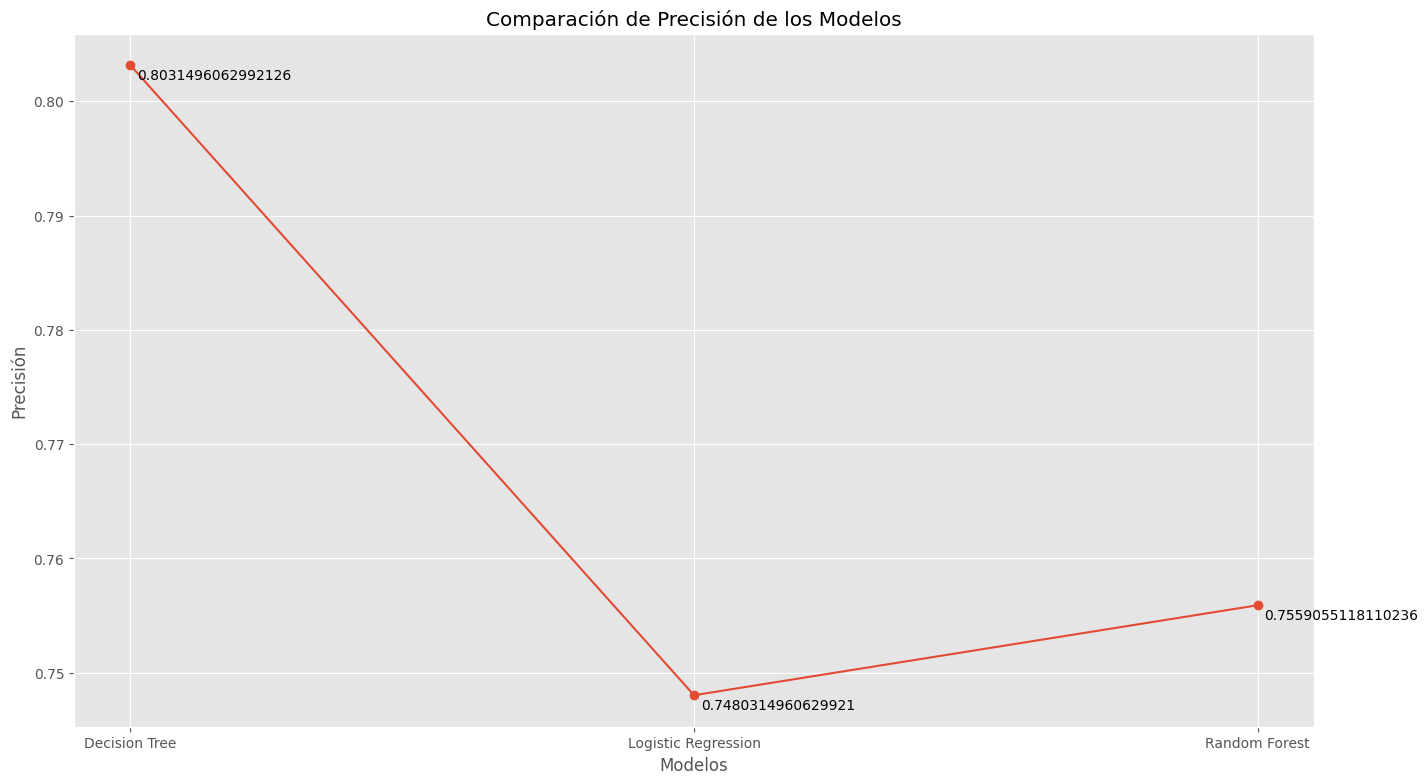

In [39]:
# Importar la librería necesaria
import matplotlib.pyplot as plt

# Crear una lista con los nombres de los modelos
modelos = ['Decision Tree', 'Logistic Regression', 'Random Forest']

# Crear una lista con las precisiones de los modelos
precisiones = [decision_tree_score, logistic_regression_score, random_forest_score]


plt.plot(modelos, precisiones, marker='o')

# Agregar etiquetas y título al gráfico
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de los Modelos')

# Agregar etiquetas con los valores de precisión
for i, j in zip(modelos, precisiones):
    plt.annotate(str(j), xy=(i, j), xytext=(5, -10), textcoords='offset points')

# Mostrar el gráfico
plt.show()
